In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import xroms
from WaterMassProperties import tad

# Turner angle example
Here we illustrate how to extract data on the native ROMS model grid, and to plot the statistics of the vertical distribution of the so-called Turner angle. The Turner angle was proposed by Ruddick [1], and is defined as

$$\mathrm{Tu} = \mathrm{tan}^{-1}\left(\alpha\frac{\partial \theta}{\partial z}-\beta\frac{\partial S}{\partial z}, \alpha\frac{\partial \theta}{\partial z}-\beta\frac{\partial S}{\partial z} \right),$$

where $\theta$ is the potential temperature, $S$ is the salinity, $\alpha$ is the thermal expansion coefficient, and $\beta$ is the haline contraction coefficient. The Turner angle can be used to investigate the stability of a water column, and the separate roles of salinity and temperature for this stability. It is related to the density ratio, but is perhaps generally more useful for diagnostics. The [Wikipedia page](https://en.wikipedia.org/wiki/Turner_angle) is informative, and as they say there, the most relevant ranges are

- _If −45° < Tu < 45°, the column is statically stable._
- _If −90° < Tu < −45°, the column is unstable to diffusive convection._
- _If 45° < Tu < 90°, the column is unstable to salt fingering._
- _If −90° > Tu or Tu > 90°, the column is statically unstable to Rayleigh–Taylor instability._

In this notebook we will be fetching a subset of the full output file and plot the median vertical distribution of the Turner angle in addition to the 5, 25, 75, and 95 percentiles. A plot is made highlighting the different regimes listed above. Note that our code uses the `gsw` package that is based on TEOS-10, and hence we do a conversion inside the `tad` function called below from potential temperature and practical salinity to conservative temperature and absolute salinity.

[1]: Ruddick, B. (1983), "A practical indicator of the stability of the water column to double-diffusive activity", _Deep Sea Res._, **30**, pp. 1105-1107.

In [2]:
# ROMS file
romsfile = "https://thredds.met.no/thredds/dodsC/havvind/ocean/reference/REF-05/norkyst_avg_0031.nc"

In [3]:
# Open with xarray and make xroms object
ds = xr.open_dataset(romsfile)
ds, xgrid = xroms.roms_dataset(ds)

In [4]:
# List CF axes that can be used for data access.
#ds.salt.cf.describe()

In [5]:
# Make subset, Skagerrak
# ds = ds.cf.isel(X=slice(300,650), Y=slice(0,300))
# maxdepth = -600.0
# resolution = 300

# # Make subset, Southern North Sea
# ds = ds.cf.isel(X=slice(0,400), Y=slice(150,1000))
# maxdepth = -400.0
# resolution = 200

# # Make subset, Norwegian Sea (deep)
# ds = ds.cf.isel(X=slice(800,2200), Y=slice(800,1100))
# maxdepth = -2000.0
# resolution = 500

# # Make subset, Barents Sea
# ds = ds.cf.isel(X=slice(2400,2720), Y=slice(0,900))
# maxdepth = -400.0
# resolution = 400

# # Make subset, Mid Norway Shelf
# ds = ds.cf.isel(X=slice(1000,1800), Y=slice(600,800))
# maxdepth = -350.0
# resolution = 350

# Make subset, Northern North Sea
ds = ds.cf.isel(X=slice(340,530), Y=slice(640,1000))
maxdepth = -260.0
resolution = 300



In [6]:
# Call function for calculating Turner angle statistical distribution.
tu, z = tad(ds.salt.values, ds.temp.values, ds.z_rho.values, maxdepth, resolution)

Text(0, 0.5, 'Depth [m]')

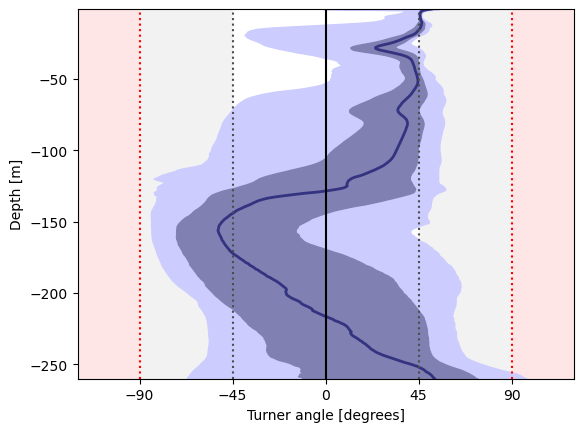

In [7]:
# Plot Turner angle distribution
plt.subplot(1,1,1)

# Mark out the four regimes listed above
plt.axvspan(-120, -90, facecolor=[1.0, 0.9, 0.9])
plt.axvspan(-90, -45, facecolor='0.95')
plt.axvspan(45, 90, facecolor='0.95')
plt.axvspan(90, 120, facecolor=[1.0, 0.9, 0.9])

# Plot percentiles and median profiles
plt.fill_betweenx(z, tu[:,0], tu[:,4], color=[0.8, 0.8, 1.0]) 
plt.fill_betweenx(z, tu[:,1], tu[:,3], color=[0.5, 0.5, 0.7]) 
plt.plot(tu[:,2], z, color=[0.2, 0.2, 0.5], linewidth = 2)

# Delineate regimes for increased clarity
plt.plot([0,0],[maxdepth, 0],'k-')
plt.plot([-45,-45],[maxdepth, 0], color='0.3', linestyle=':')
plt.plot([45,45],[maxdepth, 0], color='0.3', linestyle=':')
plt.plot([-90,-90],[maxdepth, 0],'r:')
plt.plot([90,90],[maxdepth, 0],'r:')

# Set limits, ticks, and labels
plt.xlim((-120, 120))
plt.ylim((maxdepth, -1))
plt.xticks([-90, -45, 0, 45, 90])
plt.xlabel('Turner angle [degrees]')
plt.ylabel('Depth [m]')